In [1]:
import pandas as pd

FILE = '../../other_sources/downloaded_full_set_metadata.zip'
SEPARATOR = ',' # '\t' for TSV
COMPOSER_MODE = True

In [5]:
dtype = 'string' if COMPOSER_MODE else dict(original=bool, terminated='boolean', converted='Int64', features='Int64', last_error='string')
df = pd.read_csv(FILE,
                 sep=SEPARATOR,
                 escapechar='\\',
                 index_col=0,
                 dtype=dtype)
N = len(df.index)
print(f"N = {N}")
df.head()

N = 1504109


,title,description,composer
ID,,,
4939836,"Springlek efter Perbj\""ors Erik Persson",Note Length 1/8 Rhythm polska K1 polska K1 Key...,<NA>
5401399,Excerpts in C,<NA>,<NA>
5925434,Wii Shoppin' for the Big Bands; Wii Shop Chann...,This is meant to be printed for use in Jazz Bi...,Composed by Kazumi Totaka; Arranged by Lars Ka...
3587506,Hide And Seek,"FROM MY OWN hide and seek ""movie not released""",Brandon
5161684,The First Love Dream,Note Length - 1/8 Key - G Meter - 4/4,<NA>


In [6]:
if COMPOSER_MODE:
  
  display(df.notna().sum() / N)

title          0.999993
description    0.496666
composer       0.580897
dtype: float64

In [7]:
if not COMPOSER_MODE:
  missing_originals = (~df.original).sum()
  n_converted = df.converted.notna().sum()
  n_features = df.features.notna().sum()
  print(f"missing original scores (based on available JSON files): {missing_originals}\n"
        f"successfully converted: {n_converted}/{N} ({n_converted/N:.2%})\n"
        f"missing files + converted files + conversion errors = {missing_originals + n_converted + 105099}\n"
        f"extracted features: {n_features}/{N} ({n_features/N:.2%})\n")

# Threshold
No unknowns, one composer per line

In [1]:
%load_ext autoreload
%autoreload 2
from ray_NER import basic_clean
import numpy as np
import pandas as pd

In [2]:
if not 'data' in locals():
    data = pd.read_csv('../other_sources/metadata.csv',
                     sep=',',
                     escapechar='\\',
                     index_col=0, dtype=str)

In [56]:
threshold = 10

In [57]:
data_comp=data['composer'].apply(lambda x: basic_clean(str(x)))

J. S. Bach         9819
Y. Kato  加藤 洋平     5156
W. A. Mozart       5044
L. V. Beethoven    4372
P. F. Carera       4344
                   ... 
S. D. Camacho         1
S. A. Sumika          1
R. H. P. T. Man       1
I. Watt               1
K. Konvičný           1
Name: composer, Length: 211261, dtype: int64

In [58]:
top_df=data_comp.value_counts()[:threshold]
top = top_df.index.values
top_df

J. S. Bach         9819
Y. Kato  加藤 洋平     5156
W. A. Mozart       5044
L. V. Beethoven    4372
P. F. Carera       4344
T. Fox             3389
J. Williams        2992
K. Kondo           2831
A. Antão           1391
A. Vivaldi         1347
Name: composer, dtype: int64

In [59]:
top_IDs=data_comp[data_comp.apply(lambda x: x in top)==True]

In [62]:
top_IDs

ID
6386510           A. Antão
131072          J. S. Bach
6470811    L. V. Beethoven
5322976             T. Fox
1874271         J. S. Bach
                ...       
5897397     Y. Kato  加藤 洋平
130039          J. S. Bach
5137687    L. V. Beethoven
4504286       W. A. Mozart
6117672        J. Williams
Name: composer, Length: 40685, dtype: object

In [63]:
top_IDs.to_csv(f"./best_{threshold}_composers_ID.tsv", sep='\t')
top_df.to_csv(f"./best_{threshold}_composers.tsv", sep='\t', header=["occurences"], index_label="composer")


# Stats

In [1]:
%load_ext autoreload
%autoreload 2
from ray_NER import basic_clean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
if not 'data' in locals():
    data = pd.read_csv('../other_sources/metadata.csv',
                     sep=',',
                     escapechar='\\',
                     index_col=0, dtype=str)

In [4]:
threshold = 20
counts_before =data['composer'].value_counts()
top_before = counts_before[:threshold]

In [5]:
top_before

Composer                       24810
anon.                           4274
Pierangelo Fernandes Carera     3855
Traditional                     3162
Yohei Kato * 加藤 洋平              2794
Yohei Kato * 加藤洋平               2353
Trad.                           2223
Toby Fox                        1757
Johann Sebastian Bach           1757
Trad                            1699
John Williams                   1591
Tradicional                     1541
Koji Kondo                      1533
J. S. Bach                      1402
William Marshall                1166
Ana Antão                       1053
J.S. Bach                       1028
S. M. Kudlo                     1025
Miriam Kook                      987
Eric Bingham-Kumpf               977
Name: composer, dtype: int64

<AxesSubplot: >

/home/nathan/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from current font.
  func(*args, **kwargs)
/home/nathan/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 34276 (\N{CJK UNIFIED IDEOGRAPH-85E4}) missing from current font.
  func(*args, **kwargs)
/home/nathan/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27915 (\N{CJK UNIFIED IDEOGRAPH-6D0B}) missing from current font.
  func(*args, **kwargs)
/home/nathan/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  func(*args, **kwargs)
/home/nathan/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/nathan/.local/lib/python3.10/site-packages/IPy

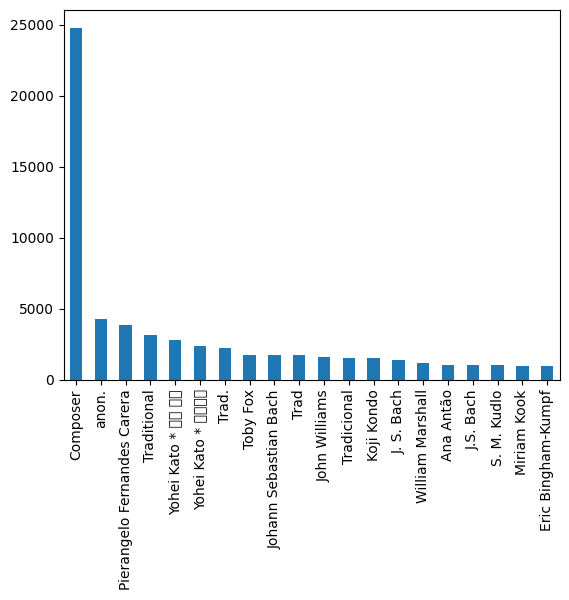

In [6]:
top_before.plot(kind='bar')

In [7]:
counts_after = data["composer"].apply(lambda x: basic_clean(str(x))).value_counts()
top_after = counts_after[:threshold]
top_after

J. S. Bach         9819
Y. Kato  加藤 洋平     5156
W. A. Mozart       5044
L. V. Beethoven    4372
P. F. Carera       4344
T. Fox             3389
J. Williams        2992
K. Kondo           2831
A. Antão           1391
A. Vivaldi         1347
J. Hisaishi        1303
H. Zimmer          1227
W. Marshall        1222
F. Schubert        1155
S. M. Kudlo        1103
J. Pachelbel       1083
J. Buchanans       1068
J. Brahms          1055
G. F. Handel        994
M. Kook             987
Name: composer, dtype: int64

<AxesSubplot: >

/home/nathan/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from current font.
  func(*args, **kwargs)
/home/nathan/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 34276 (\N{CJK UNIFIED IDEOGRAPH-85E4}) missing from current font.
  func(*args, **kwargs)
/home/nathan/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27915 (\N{CJK UNIFIED IDEOGRAPH-6D0B}) missing from current font.
  func(*args, **kwargs)
/home/nathan/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  func(*args, **kwargs)
/home/nathan/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/nathan/.local/lib/python3.10/site-packages/IPy

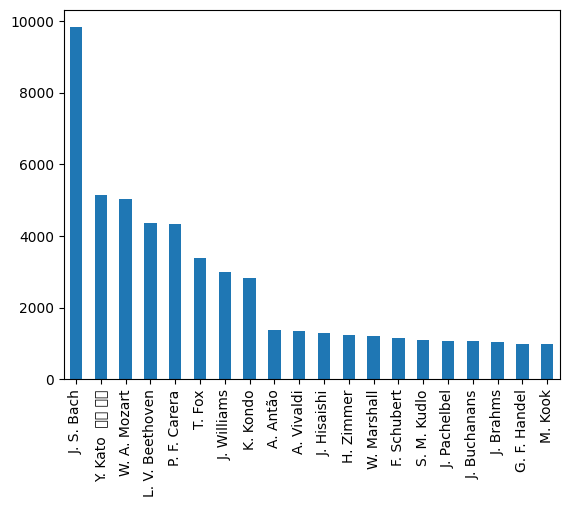

In [8]:
top_after.plot(kind='bar')